# Tugas Simulasi Monte Carlo menggunakan Supplements Sales Data  
`Anggota Kelompok 4` :  
1. Idin Naufal Hakim - NIM
2. Muhammad Faishal Rahmani - NIM
3. Farhan Nawwafal Pramudia - 10123470

## Mengimport Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_excel('../data/supplements-sales-data.xlsx')
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,3198,457314,3,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,4251,590889,4,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,1291,207851,25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,1607,22498,8,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,3547,556879,25,3,Canada,iHerb


In [3]:
df.tail()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
4379,2025-03-31,Melatonin,Sleep Aid,160,4779,76464,21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,3812,587048,22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,204,28356,12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,1831,281974,23,2,Canada,Amazon
4383,2025-03-31,Electrolyte Powder,Hydration,178,3912,696336,23,0,UK,iHerb


### Assessing Data

**Menampilkan informasi data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   int64         
 5   Revenue         4384 non-null   int64         
 6   Discount        4384 non-null   int64         
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 342.6+ KB


**Melihat Statistik dari Data**

In [5]:
df.describe()

,Date,Units Sold,Price,Revenue,Discount,Units Returned
count,4384,4384.000000,4384.000000,4.384000e+03,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,3178.014827,3.939742e+05,11.351734,1.531478
min,2020-01-06 00:00:00,103.000000,100.000000,1.284000e+04,0.000000,0.000000
25%,2021-04-26 00:00:00,142.000000,1856.000000,8.488325e+04,4.000000,1.000000
50%,2022-08-18 12:00:00,150.000000,3243.500000,3.855060e+05,11.000000,1.000000
75%,2023-12-11 00:00:00,158.000000,4531.500000,6.265555e+05,18.000000,2.000000
max,2025-03-31 00:00:00,194.000000,5997.000000,1.076185e+06,25.000000,8.000000
std,NaN,12.396099,1629.815862,2.795328e+05,7.616277,1.258479


**Memastikan Data tidak ada yang Null**

In [6]:
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

**Memastikan Data tidak ada yang duplikat**

In [7]:
df.duplicated().sum()

0

## Exploratory Data Analysis

### Analisis Rata-Rata Units Sold selama 3 Bulan ke Belakang di Tahun 2025 (January - Maret)

**Memfilter Data Units Sold 2025 Awal hingga Maret**

In [8]:
df_periode_2025 = df[df['Date'] >= '2025-01-01']
df_periode_2025 = df_periode_2025[df_periode_2025['Category'] == 'Vitamin'].reset_index()
df_periode_2025 = df_periode_2025.drop('index', axis=1)
df_periode_2025.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2025-01-06,Vitamin C,Vitamin,139,4861,675679,6,0,USA,Walmart
1,2025-01-06,Multivitamin,Vitamin,151,1566,236466,5,4,Canada,Amazon
2,2025-01-06,Biotin,Vitamin,186,3388,630168,2,2,USA,Walmart
3,2025-01-13,Vitamin C,Vitamin,160,5642,90272,7,1,Canada,Walmart
4,2025-01-13,Multivitamin,Vitamin,159,3761,597999,0,2,Canada,Amazon


**Menghitung Frekuensi Units Sold Periode Januari-Maret 2025**

In [9]:
print(f"Rata-Rata Units Sold dengan produk Berkategori Vitamin : {np.mean(df_periode_2025['Units Sold']):.0f}")

Rata-Rata Units Sold dengan produk Berkategori Vitamin : 147


### Analisis Rata-Rata Units Sold selama 3 Bulan ke Depan

In [10]:
df_vitamin = df[df['Category'] == 'Vitamin'].reset_index()
df_vitamin = df_vitamin.drop('index', axis=1)
df_vitamin.head()
print(f'Total produk yang berkategori Vitamin : {df_vitamin.shape[0]} baris')

Total produk yang berkategori Vitamin : 822 baris


**Menghitung Frekuensi Units Sold yang Bernilai Unik**

In [11]:
units_sold_freq = df_vitamin['Units Sold'].value_counts().sort_index().reset_index()
units_sold_freq.columns = ['Units Sold', 'Frequency']
units_sold_freq.head()

,Units Sold,Frequency
0,103,1
1,109,1
2,114,1
3,116,1
4,117,1


**Menghitung Probabilitas dari Units Sold**

In [12]:
units_sold_freq['Probability'] = units_sold_freq['Frequency'] / units_sold_freq['Frequency'].sum()
units_sold_freq.head()

,Units Sold,Frequency,Probability
0,103,1,0.001217
1,109,1,0.001217
2,114,1,0.001217
3,116,1,0.001217
4,117,1,0.001217


**Menghitung Kumulatif Probabilitas**

In [13]:
units_sold_freq['Cumulative Probability'] = units_sold_freq['Probability'].cumsum()

**Menampilkan Kumulatif Probabilitas 5 Baris Pertama**

In [14]:
df_simulasi = units_sold_freq
df_simulasi.head()

,Units Sold,Frequency,Probability,Cumulative Probability
0,103,1,0.001217,0.001217
1,109,1,0.001217,0.002433
2,114,1,0.001217,0.003650
3,116,1,0.001217,0.004866
4,117,1,0.001217,0.006083


**Menampilkan Kumulatif Probabilitas dari 5 Baris Terakhir**

In [15]:
df_simulasi.tail()

,Units Sold,Frequency,Probability,Cumulative Probability
67,182,1,0.001217,0.990268
68,183,2,0.002433,0.992701
69,184,3,0.003650,0.996350
70,185,2,0.002433,0.998783
71,186,1,0.001217,1.000000


## Simulasi Monte Carlo

**Membuat Bilangan Acak**

In [16]:
# Menetukan jumlah simulasi dan memprediksi Units Sold selama 3 bulan ke depan (12 minggu)
n_simulasi = 100
minggu = 12

In [17]:
# Membuat bilangan acak
bil_acak = np.random.rand(n_simulasi, minggu)

**Mapping Bilangan Acak ke Interval Kelas**

In [18]:
# Membuat fungsi untuk mapping
def map_to_units_sold(random_number, dataframe):
    return dataframe.loc[dataframe['Cumulative Probability'] >= random_number, 'Units Sold'].iloc[0]

In [19]:
# Melakukan simulasi
simulasi = np.zeros((n_simulasi, minggu), dtype=int)

for i in range(n_simulasi):
    for j in range(minggu):
        simulasi[i, j] = map_to_units_sold(bil_acak[i, j], df_simulasi)

In [20]:
# Hitung total units sold simulasi
total_per_simulasi = simulasi.sum(axis=1)

In [21]:
# Hitung rata-rata penjualan selama 3 bulan
rata_rata_simulasi = np.mean(total_per_simulasi)
print(f'Rata-rata simulasi untuk Units Sold selama {minggu/4:.0f} bulan : {rata_rata_simulasi:.0f}')

Rata-rata simulasi untuk Units Sold selama 3 bulan : 1802


**Grafik Distribusi Units Sold dari Produk dengan Kategori Vitamin**

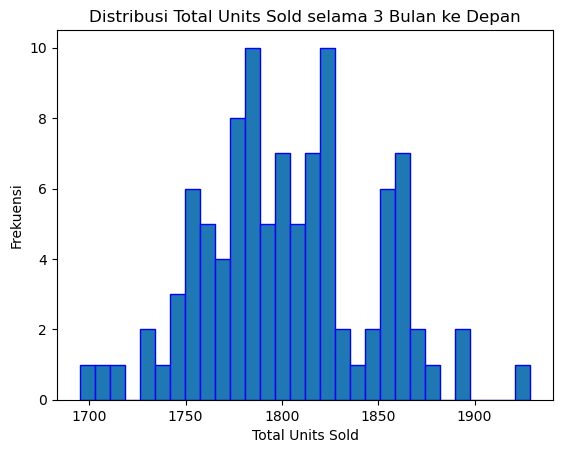

In [22]:
plt.hist(total_per_simulasi, bins=30, edgecolor='blue')
plt.title(f'Distribusi Total Units Sold selama {minggu/4:.0f} Bulan ke Depan')
plt.xlabel('Total Units Sold')
plt.ylabel('Frekuensi')
plt.show()